\begin{align*}
S'(t) &= -\beta \cdot S \cdot I \\
E'(t) &= \beta \cdot S \cdot I - \alpha \cdot E \\
I'(t) &= \alpha \cdot E - \gamma \cdot I \\
R'(t) &= \gamma \cdot (1 - \mu) \cdot I \\
D'(t) &= \gamma \cdot \mu \cdot I
\end{align*}


In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

In [2]:
data = pd.read_csv("Project_SEIRD_Kor.csv")

In [3]:
data

,week,S,E,I,R,D
0,1,51659973,24,3,0,0
1,2,51659944,15,11,3,0
2,3,51659182,735,13,14,0
3,4,51654971,4182,2,27,0
4,5,51647590,6619,733,22,7
5,6,51639362,4024,3449,739,23
6,7,51630425,1579,3170,4160,51
7,8,51620816,1425,854,7306,75
8,9,51610608,1323,725,8124,111
9,10,51600183,876,700,8802,158


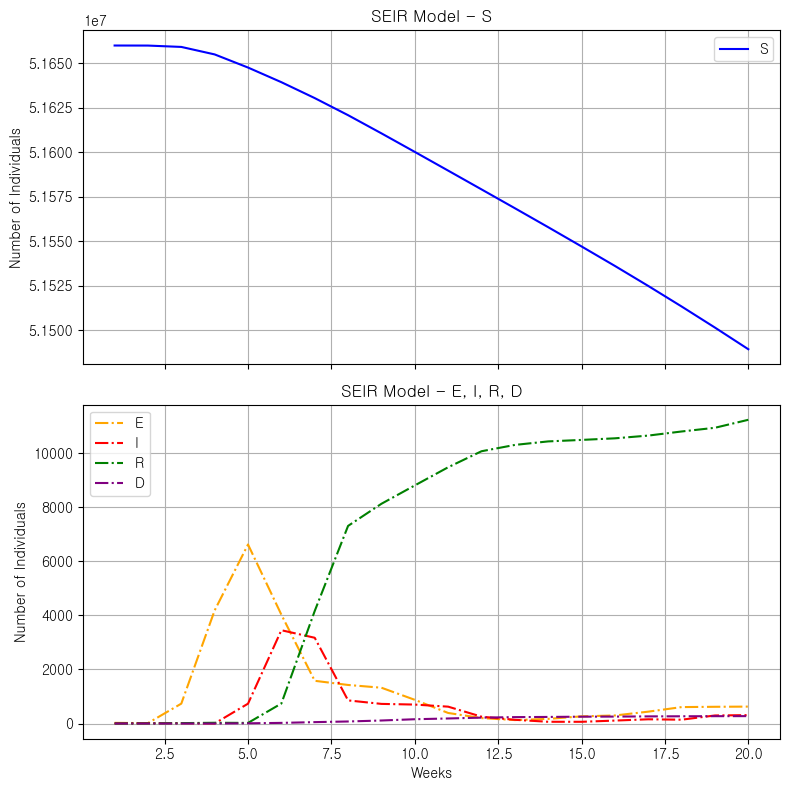

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(data['week'], data['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(data['week'], data['E'], label='E', color='orange', linestyle='-.')
ax2.plot(data['week'], data['I'], label='I', color='red', linestyle='-.')
ax2.plot(data['week'], data['R'], label='R', color='green', linestyle='-.')
ax2.plot(data['week'], data['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()


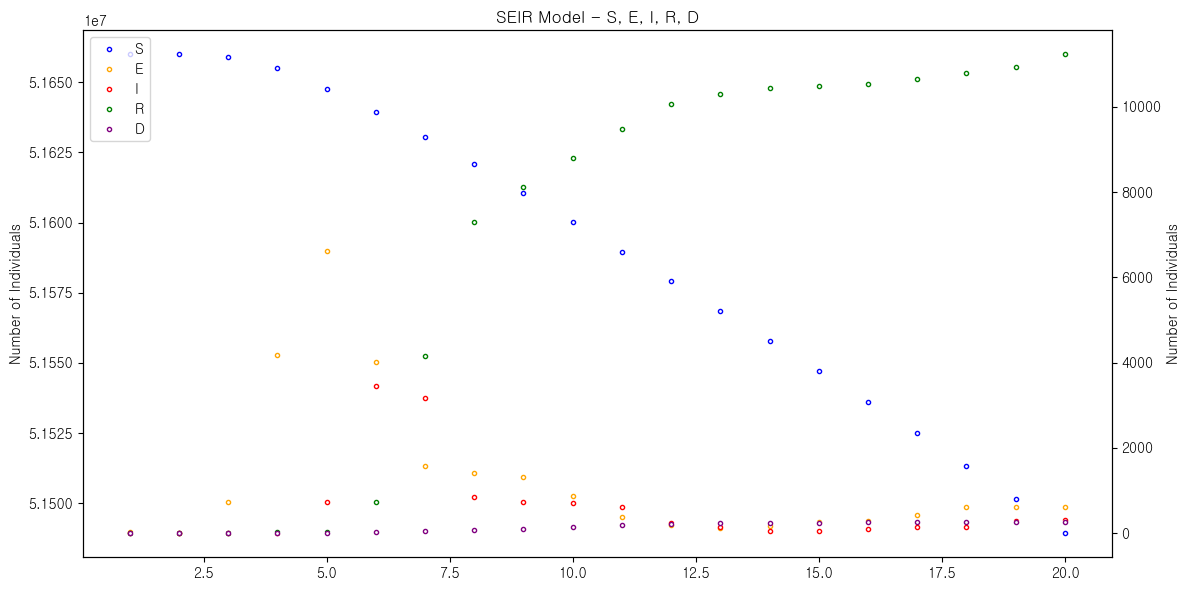

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', mec="blue", color='white', linestyle='--', marker=".")
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', mec='orange', color='white', linestyle='--', marker=".")
ax2.plot(data['week'], data['I'], label='I', mec='red', color='white', linestyle='--', marker=".")
ax2.plot(data['week'], data['R'], label='R', mec='green', color='white',linestyle='--', marker=".")
ax2.plot(data['week'], data['D'], label='D', mec='purple', color='white',linestyle='--', marker=".")
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()

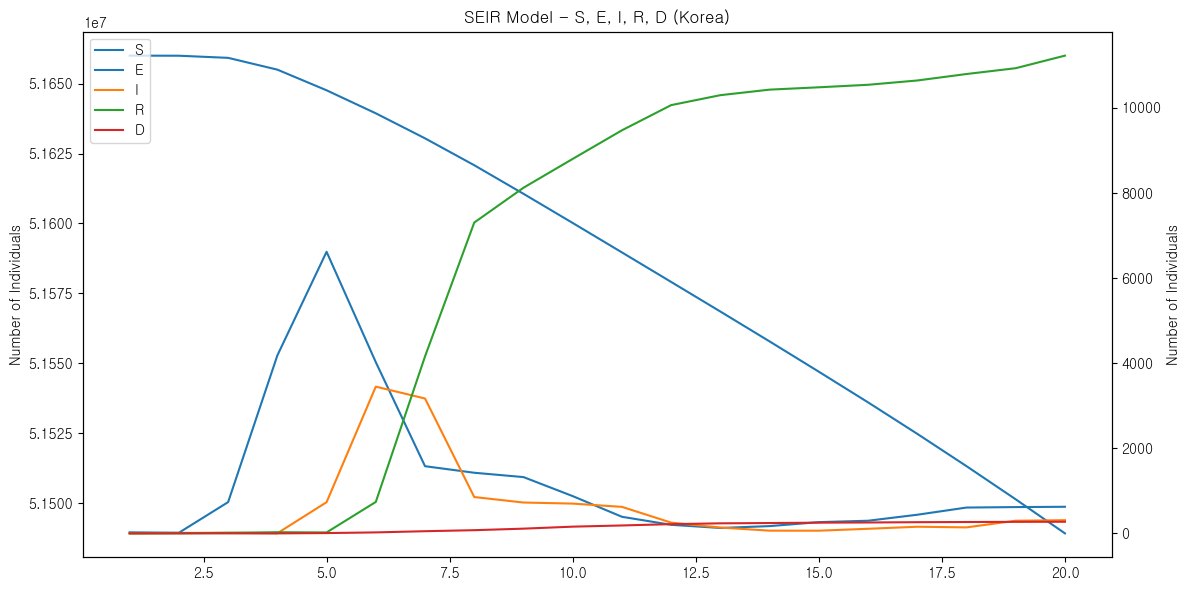

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', linestyle='-')
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', linestyle='-')
ax2.plot(data['week'], data['I'], label='I', linestyle='-')
ax2.plot(data['week'], data['R'], label='R',linestyle='-')
ax2.plot(data['week'], data['D'], label='D',linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D (Korea)')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()

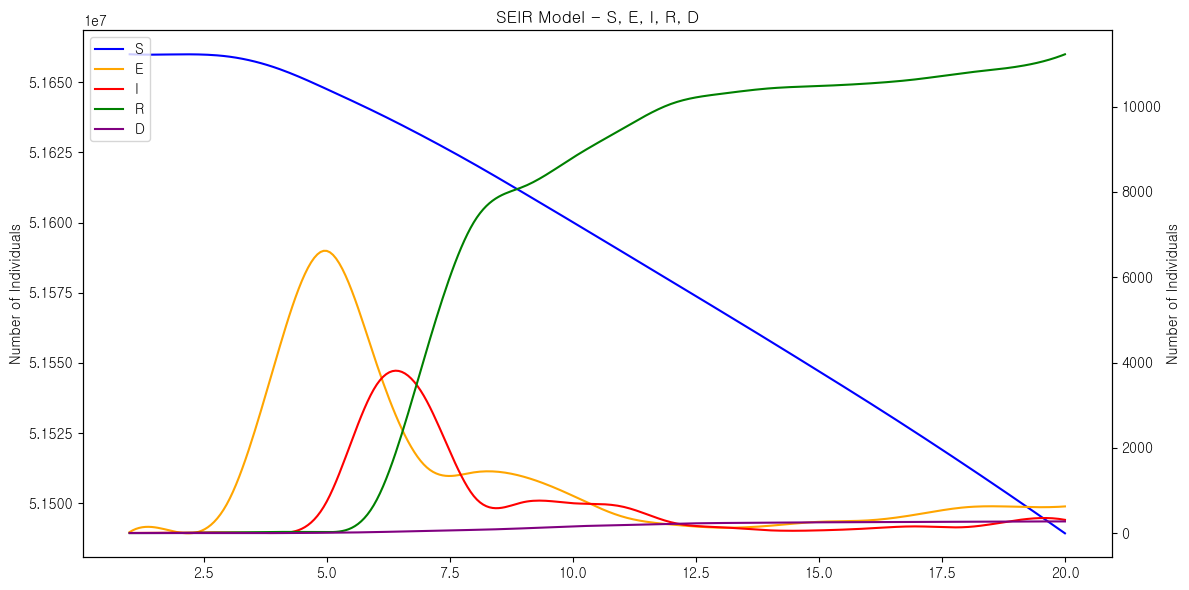

In [6]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Assume data is your original data

# Create a new set of x values for smooth curve
x_smooth = np.linspace(data['week'].min(), data['week'].max(), 300)

# Perform spline interpolation on each curve (S, E, I, R, D)
spl_S = make_interp_spline(data['week'], data['S'])
spl_E = make_interp_spline(data['week'], data['E'])
spl_I = make_interp_spline(data['week'], data['I'])
spl_R = make_interp_spline(data['week'], data['R'])
spl_D = make_interp_spline(data['week'], data['D'])

# Generate smooth y values for each curve
S_smooth = spl_S(x_smooth)
E_smooth = spl_E(x_smooth)
I_smooth = spl_I(x_smooth)
R_smooth = spl_R(x_smooth)
D_smooth = spl_D(x_smooth)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(x_smooth, S_smooth, label='S', color='blue', linestyle='-')
ax1.set_ylabel('Number of Individuals')

ax2 = ax1.twinx()

ax2.plot(x_smooth, E_smooth, label='E', color='orange', linestyle='-')
ax2.plot(x_smooth, I_smooth, label='I', color='red', linestyle='-')
ax2.plot(x_smooth, R_smooth, label='R', color='green', linestyle='-')
ax2.plot(x_smooth, D_smooth, label='D', color='purple', linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()

SEIR 모델에서 매개변수(alpha, gamma, beta, mu)의 값을 찾기 위해 data fitting을 하고자 할 때 다양한 방법을 사용할 수 있습니다. 가장 좋은 방법의 선택은 데이터의 특성, SEIR 모델의 복잡성 및 문제의 특정 특성에 따라 다릅니다. 다음은 SEIR 모델의 맥락에서 데이터 피팅을 위한 몇 가지 일반적인 방법입니다.


1. NLS(Nonlinear Least Squares) 방법: 이것은 비선형 매개변수가 있는 모델에 데이터를 맞추는 데 널리 사용되는 접근 방식입니다. NLS는 모델 예측과 관측 데이터 간의 차이 제곱합을 최소화하는 것을 목표로 합니다. 매개변수(알파, 감마, 베타 및 mu)를 조정하여 모델과 데이터 간의 오류를 최소화합니다.

2. Maximum Likelihood Estimation (MLE): MLE는 주어진 데이터를 관찰할 확률을 최대화하는 매개변수 값을 찾는 통계적 방법입니다. SEIR 모델의 맥락에서 관찰된 감염 및 복구 데이터의 가능성을 최대화하는 매개변수를 결정합니다.

3. Markov Chain Monte Carlo(MCMC): MCMC는 매개변수 추정에 사용되는 베이지안 접근법입니다. 데이터가 주어진 매개변수의 사후 분포에서 샘플링합니다. MCMC는 데이터와 모델에 불확실성이 있을 때 유용하며 다양한 타당한 매개변수 값을 얻을 수 있습니다.

4. 유전 알고리즘: 유전 알고리즘은 자연 선택 과정에서 영감을 받은 최적화 기술입니다. 관찰된 데이터에 SEIR 모델에 가장 적합한 매개변수 값을 찾기 위해 적용할 수 있습니다.

5. 파라미터 민감도 분석: 직접 피팅 방법은 아니지만 다른 피팅 기법을 보완할 수 있습니다. 매개변수 민감도 분석은 개별 매개변수의 변경이 모델의 동작 및 출력에 어떤 영향을 미치는지 이해하는 데 도움이 됩니다. 이를 통해 모델의 예측에 가장 큰 영향을 미치는 매개변수를 식별할 수 있습니다.

최상의 방법을 선택할 때 다음 요소를 고려하십시오.


데이터의 크기 및 품질: 일부 방법은 작거나 잡음이 많은 데이터 세트에 더 적합합니다.
SEIR 모델의 복잡성: 모델이 복잡할수록 고급 피팅 기술이 필요할 수 있습니다.
불확실성의 존재: 매개변수 추정치의 불확실성을 정량화하려는 경우 베이지안 방법이 선호될 수 있습니다.

실제로는 특정 데이터 및 모델링 요구에 가장 적합한 접근 방식을 결정하기 위해 다양한 방법으로 실험하고 적합도, 계산 효율성 및 매개변수 추정의 안정성을 비교해야 할 수 있습니다. 또한 역학 모델링 및 데이터 피팅 전문가와 상담하면 정보에 입각한 결정을 내리는 데 도움이 될 수 있습니다.

# NLS

In [7]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# Step 1: Load data from CSV file
t_observed = data['week'].values
S_observed = data['S'].values
E_observed = data['E'].values
I_observed = data['I'].values
R_observed = data['R'].values
D_observed = data['D'].values

# Step 2: Define the ODE system
def ode_system(y, t, beta, alpha, gamma, mu):
    S, E, I, R, D = y
    dS = -beta * S * I
    dE = beta * S * I - alpha * E
    dI = alpha * E - gamma * I
    dR = gamma * (1 - mu) * I
    dD = gamma * mu * I
    return [dS, dE, dI, dR, dD]

# Step 3: Define the objective function
def objective_function(t, beta, alpha, gamma, mu):
    y0_initial = [S_observed[0], E_observed[0], I_observed[0], R_observed[0], D_observed[0]]
    y_model = odeint(ode_system, y0_initial, t, args=(beta, alpha, gamma, mu)).T
    S_model, E_model, I_model, R_model, D_model = y_model
    residuals = np.concatenate((S_model - S_observed, E_model - E_observed, I_model - I_observed, R_model - R_observed, D_model - D_observed))
    return residuals

# Step 4: Minimize the objective function
initial_guess = [0.5, 0.1, 0.1, 0.01]  # Provide initial guesses for the parameters (beta, alpha, gamma, mu)
params_optimal, _ = curve_fit(objective_function, t_observed, np.concatenate((S_observed, E_observed, I_observed, R_observed, D_observed)), p0=initial_guess, method='lm', maxfev=10000)

# Step 5: Evaluate the results
beta_opt, alpha_opt, gamma_opt, mu_opt = params_optimal
y0_initial = [S_observed[0], E_observed[0], I_observed[0], R_observed[0], D_observed[0]]
y_model = odeint(ode_system, y0_initial, t_observed, args=(beta_opt, alpha_opt, gamma_opt, mu_opt)).T
S_opt, E_opt, I_opt, R_opt, D_opt = y_model

# Step 6: Output the estimated parameters
print("Estimated parameters:")
print("Beta:", beta_opt)
print("Alpha:", alpha_opt)
print("Gamma:", gamma_opt)
print("Mu:", mu_opt)

Estimated parameters:
Beta: 0.6203157438460506
Alpha: 0.16108615306802115
Gamma: 0.12941498922174652
Mu: 0.5154943997026817


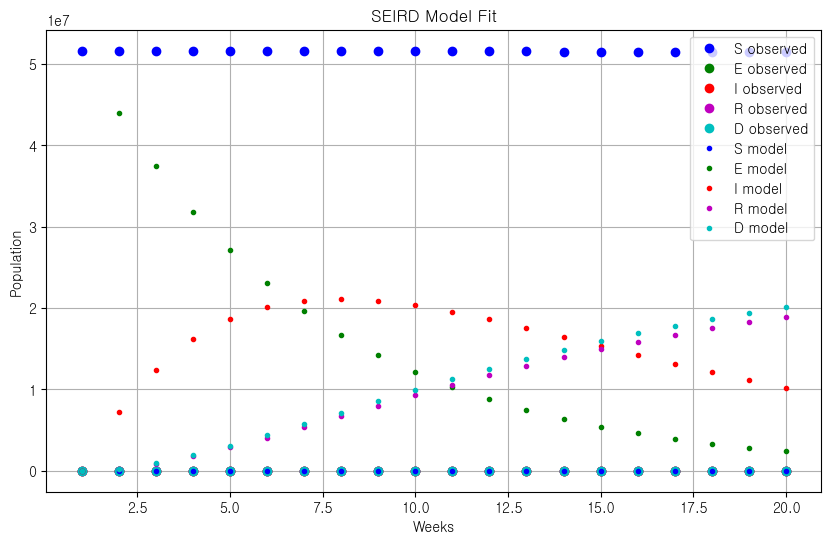

In [8]:
# Step 7: Visualize the fit
plt.figure(figsize=(10, 6))
plt.plot(t_observed, S_observed, 'bo', label='S observed')
plt.plot(t_observed, E_observed, 'go', label='E observed')
plt.plot(t_observed, I_observed, 'ro', label='I observed')
plt.plot(t_observed, R_observed, 'mo', label='R observed')
plt.plot(t_observed, D_observed, 'co', label='D observed')

plt.plot(t_observed, S_opt, 'b.', label='S model')
plt.plot(t_observed, E_opt, 'g.', label='E model')
plt.plot(t_observed, I_opt, 'r.', label='I model')
plt.plot(t_observed, R_opt, 'm.', label='R model')
plt.plot(t_observed, D_opt, 'c.', label='D model')

plt.xlabel('Weeks')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.title('SEIRD Model Fit')
plt.show()